In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

np.random.seed(42)

# Data Importing and Processing

In [2]:
# Load and preprocess data
df = pd.read_excel('pif_locations_with_PROP_TYPE.xlsx')


### Features Engineering

In [3]:
# Encoding 'PSYTEGroupCode'into different levels of income
if 'PSYTEGroupCode' in df.columns:
    def income_group(ps):
        if ps in [1, 2, 3, 4]:  # Hardcoded for High Income
            return 'High Income'
        elif ps in [5, 6, 7, 8]:  # Hardcoded for Middle Income
            return 'Middle Income'
        elif ps in [9, 10, 11, 12]:  # Hardcoded for Low Income
            return 'Low Income'
        else:
            return 'Unknown'  # For cases outside the defined values

    # Apply the encoding to the PSYTEGroupCode column
    df['IncomeGroup'] = df['PSYTEGroupCode'].apply(income_group)

# Encoding 'adultAgeVariableDescription'into 3 different categories: Above Middle, Below Middle and Mixed Age
if 'adultAgeVariableDescription' in df.columns:
    def income_group(ps):
        if ps in ['Majority of adult population aged under 29 (young)', 'Majority of adult population aged under 39 (younger)'
                  , 'Majority of adult population aged under 50 and not classed above (below middle age)']:  # Hardcoded for Below Middle Age
            return 'Below Middle Age'
        elif ps in ['Majority of adult population aged 50+ and not classed above (above middle age)',
                    'Majority of adult population aged 50-64 (above middle age)'
                    'Majority of adult population aged 65+ (retired)']:  # Hardcoded for Above Middle Age
            return 'Above Middle Age'
        elif ps in ['Majority of adult population aged 40-59 (middle age)',
                   'Mixed age', 'Not Classified ']:  # Hardcoded for Mixed Age
            return 'Mixed Age'
        else:
            return 'Mixed Age'  # For cases outside the defined values

    # Apply the encoding to the PSYTEGroupCode column
    df['AgeGroup'] = df['adultAgeVariableDescription'].apply(income_group)

    
# Display the updated DataFrame
df

,preciselyID,PolicyNo,AddressLine1,City,StateProvince,PostalCode,Extended postalcode,Latitude,Longitude,County,...,communityNumber,communityStatus,addressLocationElevationFeet,year100FloodZoneDistanceFeet,year500FloodZoneDistanceFeet,distanceToNearestWaterbodyFeet,nameOfNearestWaterbody,PROP_TYPE,IncomeGroup,AgeGroup
0,P00005K4RS6B,299681,206 N Highway 22 A,Panama City,FL,32404,6238.0,30.149482,-85.599246,Bay County,...,120005,R,30,897,1546,1604,Lake Martin,R,Middle Income,Below Middle Age
1,P00005K4RRYL,299687,4710 Colorado St,Panama City,FL,32404,6219.0,30.150735,-85.603292,Bay County,...,120014,R,27,324,275,381,Lake Martin,R,Low Income,Above Middle Age
2,P00005K4RN51,299707,1319 N Gray Ave,Panama City,FL,32401,4432.0,30.172218,-85.626478,Bay County,...,120004,R,29,0,514,3774,NaN,R,Low Income,Below Middle Age
3,P00005K4S0GQ,363313,4131 Harlan Shope Rd,Panama City,FL,32404,9305.0,30.263220,-85.592546,Bay County,...,120004,R,10,41,1198,116,Deer Point Lake,R,Middle Income,Mixed Age
4,P00005K4SN8K,481058,6233 Pinetree Ave,Panama City,FL,32408,3518.0,30.152559,-85.763206,Bay County,...,120004,R,10,30,-999999,10951,Grand Lagoon,R,Low Income,Above Middle Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,P00005K4RS3C,467182,5405 Ella St,Panama City,FL,32404,6308.0,30.151790,-85.593690,Bay County,...,120005,R,26,854,1501,3323,Lake Martin,R,Middle Income,Above Middle Age
155,P00005K4SX60,298660,7638 Leon Ave,Panama City,FL,32409,1338.0,30.289485,-85.652416,Bay County,...,120004,R,16,0,3607,84,NaN,R,Low Income,Below Middle Age
156,P00005K4S6QA,299693,2619 Mound Ave,Panama City,FL,32405,1232.0,30.198163,-85.712794,Bay County,...,120004,R,4,0,522,5165,Pretty Bayou,R,Middle Income,Above Middle Age
157,P00005K4RRUE,299656,104 El Dorado Cir,Panama City,FL,32404,6602.0,30.145385,-85.600491,Bay County,...,120014,R,29,1413,1347,1476,Lake Martin,R,Low Income,Above Middle Age


### Data Filtering

In [4]:
# Filter to keep only Residential Property Types as we focus on Homeowners insurance
df = df[df['PROP_TYPE'] == 'R']

# Select relevant demographics, building attributes columns according to Clover research and flood, coastal risk columns
columns = [
    'Premium', 'PROP_LIVINGSQFT', 'PROP_ROOFCOVER', 'PROP_YRBLD', 'buildingTypeDescription', 'exteriorWallsDescription', # property attributes
    'floorTypeValue', 'propertyTenureVariableDescription', 'AgeGroup', 'IncomeGroup', # demographics
    'floodZone', 'addressLocationElevationFeet', 'year100FloodZoneDistanceFeet', # flood risks
    'distanceToNearestCoastFeet' # coastal risks
]
df = df[columns]

# Drop all rows with NaN values
df = df.dropna()

### Plotting the independent variables vs Premiums

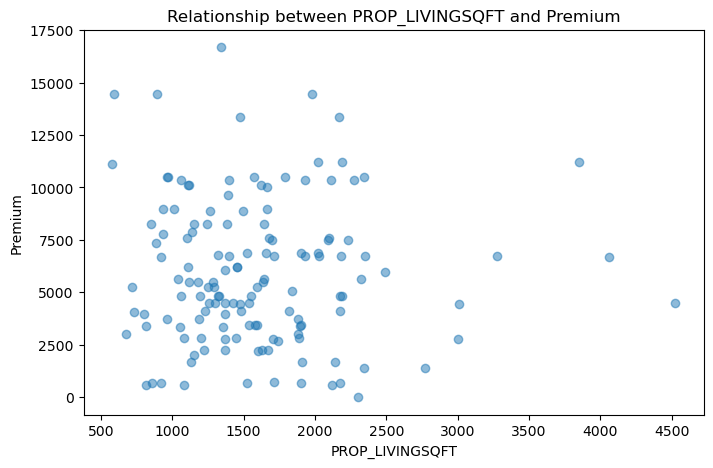

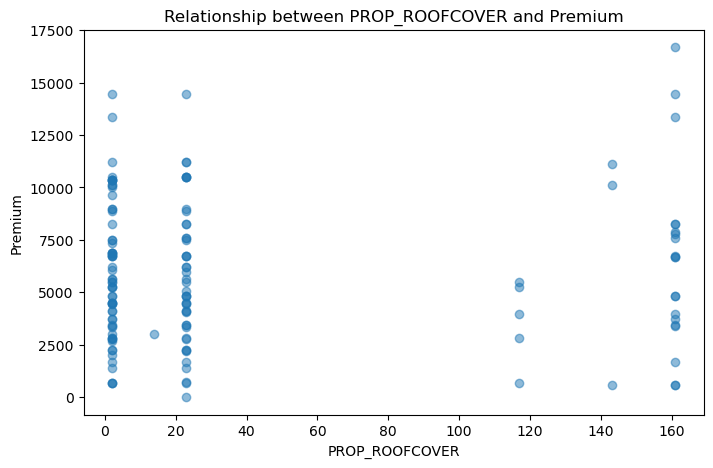

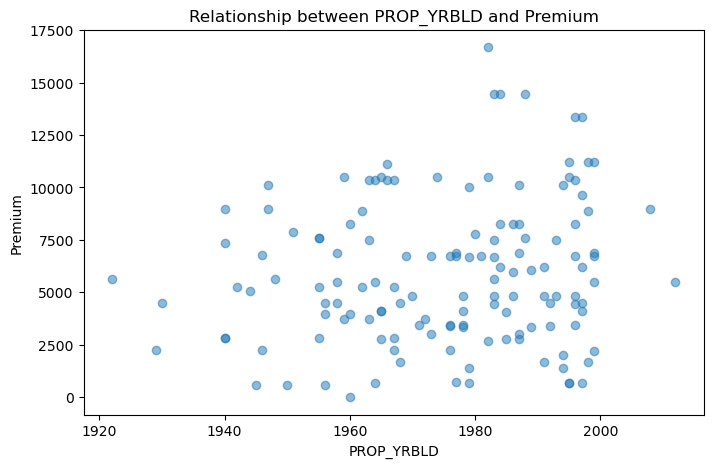

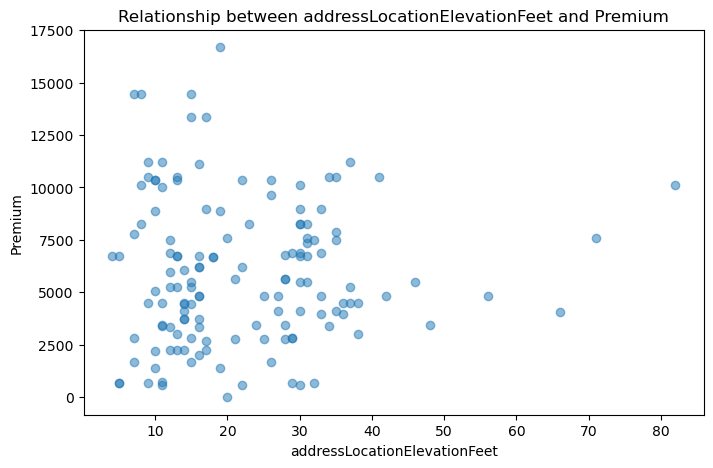

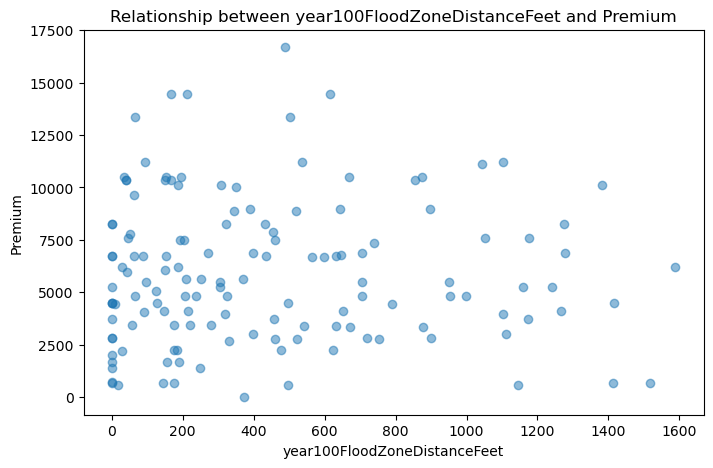

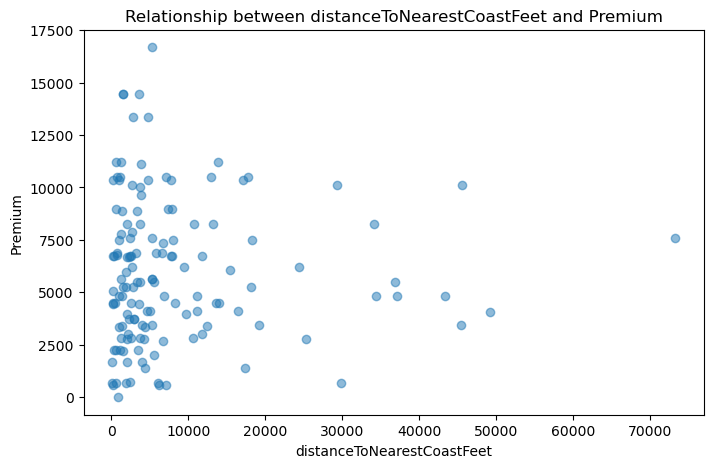

<Figure size 1000x600 with 0 Axes>

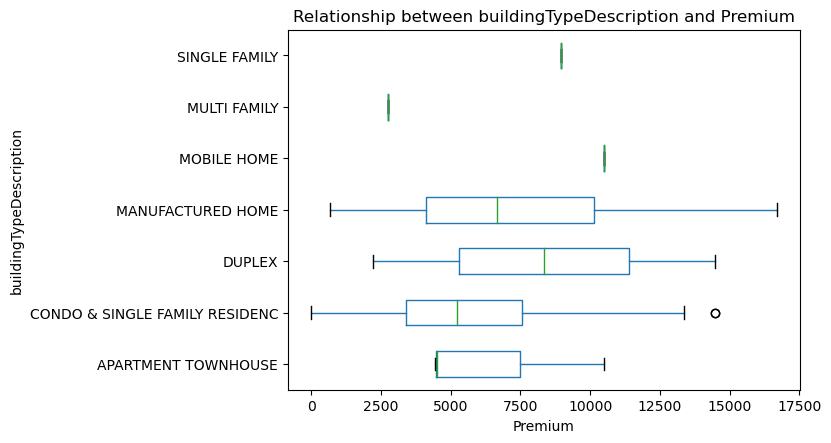

<Figure size 1000x600 with 0 Axes>

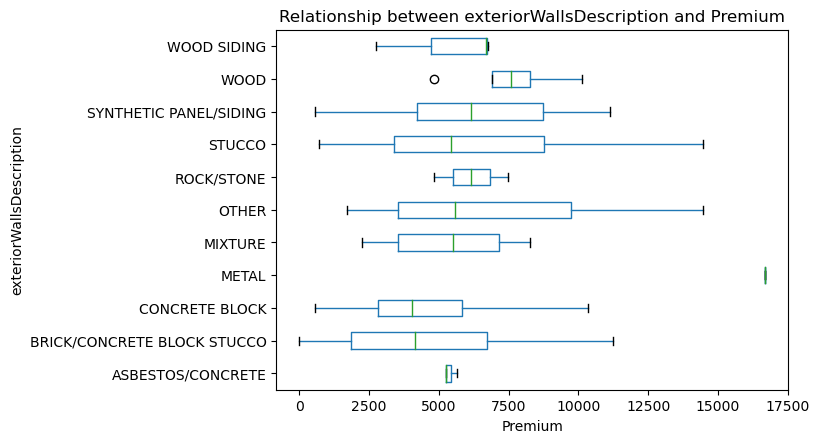

<Figure size 1000x600 with 0 Axes>

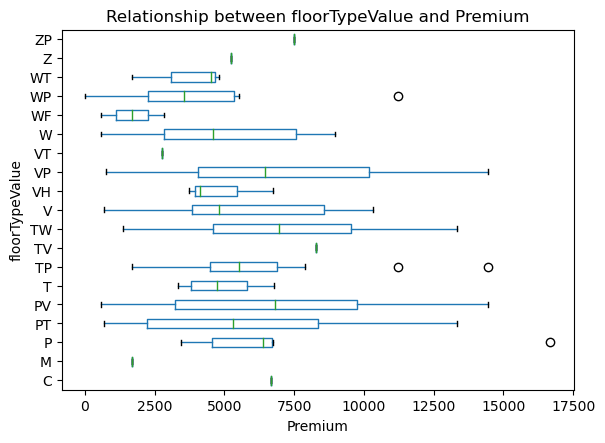

<Figure size 1000x600 with 0 Axes>

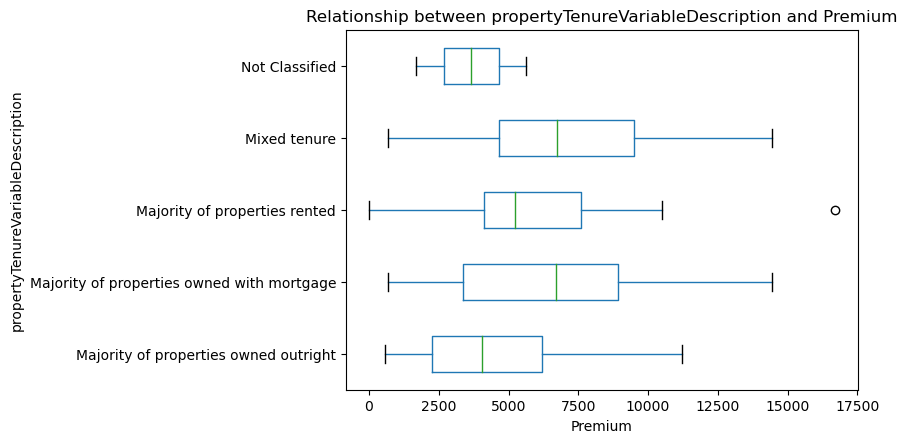

<Figure size 1000x600 with 0 Axes>

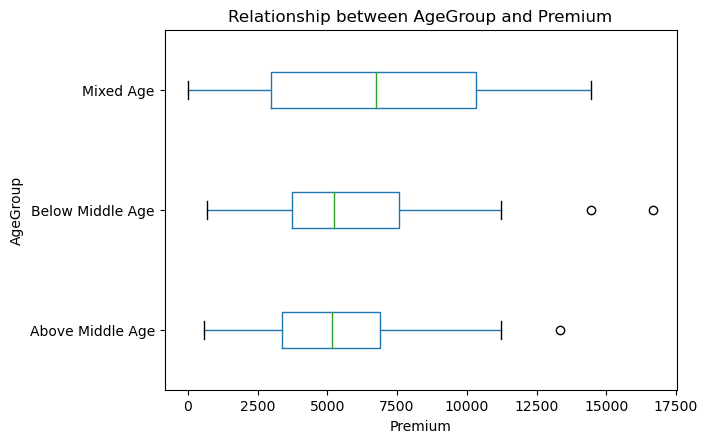

<Figure size 1000x600 with 0 Axes>

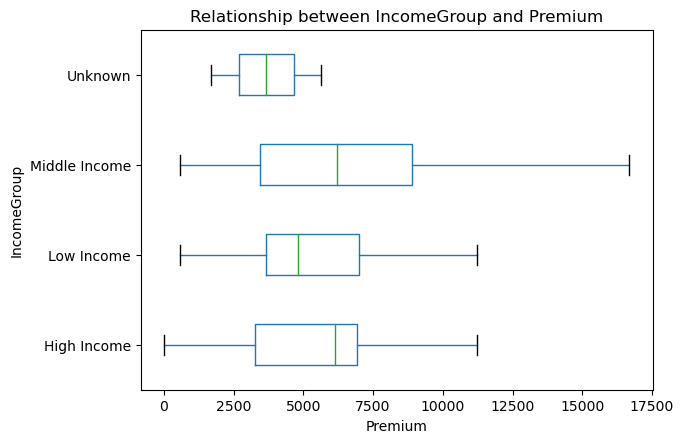

<Figure size 1000x600 with 0 Axes>

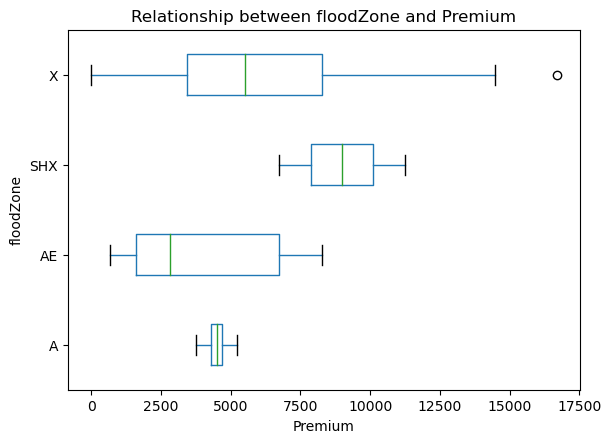

In [5]:
# Separate numerical and categorical variables
numerical_vars = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_vars = df.select_dtypes(include=[object]).columns.tolist()

# Plot numerical variables against Premium
for col in numerical_vars:
    if col != 'Premium':
        plt.figure(figsize=(8, 5))
        plt.scatter(df[col], df['Premium'], alpha=0.5)
        plt.title(f'Relationship between {col} and Premium')
        plt.xlabel(col)
        plt.ylabel('Premium')
        plt.show()

# Plot categorical variables against Premium
for col in categorical_vars:
    plt.figure(figsize=(10, 6))
    df.boxplot(column='Premium', by=col, grid=False, vert=False)
    plt.title(f'Relationship between {col} and Premium')
    plt.suptitle('')  # Suppress automatic title to keep it clean
    plt.xlabel('Premium')
    plt.ylabel(col)
    plt.show()

#### Independent variables seem not to have clear linear relationship with Premiums

### Handling outliers

In [6]:
# Handle outliers in 'Premium' using IQR method
Q1 = df['Premium'].quantile(0.25)
Q3 = df['Premium'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Premium'] >= lower_bound) & (df['Premium'] <= upper_bound)]

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)
# Ensure all boolean columns are converted to integers after encoding
df = df.applymap(lambda x: 1 if x is True else 0 if x is False else x)


# Split data into training and test sets
X = df.drop(columns=['Premium'])
y = df['Premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[X_train.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))
X_test[X_test.select_dtypes(include=[np.number]).columns] = scaler.transform(X_test.select_dtypes(include=[np.number]))



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 0 to 158
Data columns (total 52 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Premium                                                                       138 non-null    int64  
 1   PROP_LIVINGSQFT                                                               138 non-null    int64  
 2   PROP_ROOFCOVER                                                                138 non-null    float64
 3   PROP_YRBLD                                                                    138 non-null    int64  
 4   addressLocationElevationFeet                                                  138 non-null    int64  
 5   year100FloodZoneDistanceFeet                                                  138 non-null    int64  
 6   distanceToNearestCoastFeet             

# Modelling

### Build Regression models before and after removing VIF > 5 variables

In [8]:
# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Iterative VIF filtering to keep only variables with VIF <= 5
def filter_vif(X, threshold=5):
    while True:
        vif = calculate_vif(X)
        max_vif = vif["VIF"].max()
        if max_vif > threshold:
            feature_to_remove = vif.loc[vif["VIF"] == max_vif, "Feature"].values[0]
            print(f"Removing feature: {feature_to_remove} with VIF: {max_vif}")
            X = X.drop(columns=[feature_to_remove])
        else:
            break
    return X

# Apply VIF filtering to X_train
X_train_filtered = filter_vif(X_train, threshold=5)
X_test_filtered = X_test[X_train_filtered.columns]  # Ensure test set matches filtered train set


Removing feature: propertyTenureVariableDescription_Not Classified with VIF: inf


C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature: floorTypeValue_PV with VIF: 35.97204090683436
Removing feature: buildingTypeDescription_CONDO & SINGLE FAMILY RESIDENC with VIF: 21.97407228054371
Removing feature: floodZone_X with VIF: 20.91637136271769

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



Removing feature: exteriorWallsDescription_SYNTHETIC PANEL/SIDING with VIF: 17.62928901349456
Removing feature: IncomeGroup_Low Income with VIF: 5.154570334623665


C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


### Train and Evaluate Regression models before and after removing VIF > 5 variables, Random Forest and Gradient Boosting

In [9]:
# Train all models

# Model 1: Regression with all variables
reg_model_all = LinearRegression()
reg_model_all.fit(X_train, y_train)

# Model 2: Regression with variables after iterative VIF filtering
reg_model_vif = LinearRegression()
reg_model_vif.fit(X_train_filtered, y_train)

# Model 3: Random Forest with all variables
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Model 4: Gradient Booasting with all variables
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [10]:
# Evaluate all models on test data
reg_pred_all = reg_model_all.predict(X_test)
reg_pred_vif = reg_model_vif.predict(X_test_filtered)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Collect evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} - R2: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

evaluate_model(y_test, reg_pred_all, "Regression with All")
evaluate_model(y_test, reg_pred_vif, "Regression after VIF")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, gb_pred, "Gradient Boosting")



Regression with All - R2: -0.8054, MSE: 17270779.2131, RMSE: 4155.8127
Regression after VIF - R2: -0.7559, MSE: 16796788.7302, RMSE: 4098.3886
Random Forest - R2: -0.4125, MSE: 13511652.8505, RMSE: 3675.8200
Gradient Boosting - R2: -1.1927, MSE: 20975748.5178, RMSE: 4579.9289


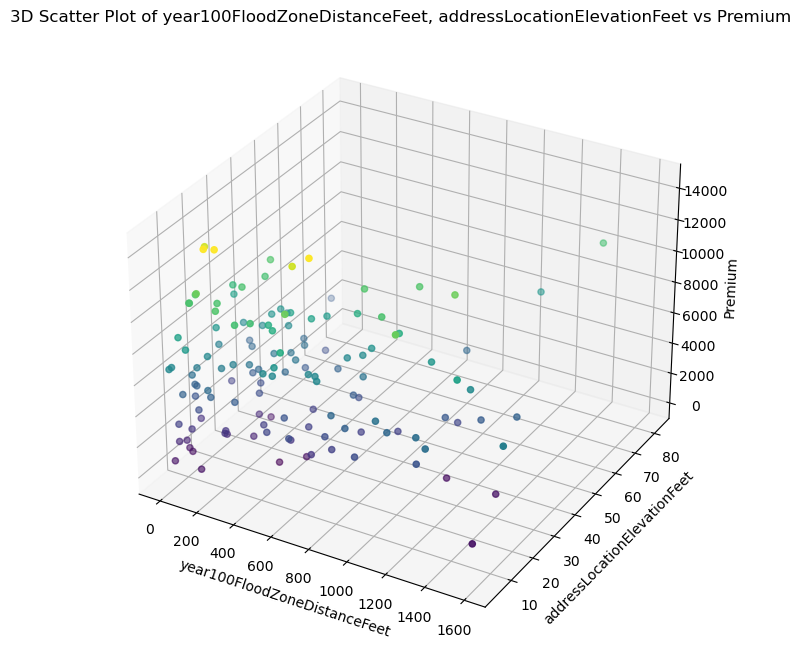

In [11]:
# Plot the relationship between 'year100FloodZoneDistanceFeet' and 'addressLocationElevationFeet' vs 'Premium'
x_var = 'year100FloodZoneDistanceFeet'
y_var = 'addressLocationElevationFeet'
z_var = 'Premium'

# Plot the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x_var], df[y_var], df[z_var], c=df[z_var], cmap='viridis', marker='o')
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_zlabel(z_var)
plt.title(f"3D Scatter Plot of {x_var}, {y_var} vs {z_var}")
plt.show()

##### This graph provides evidence that a purely linear model may not fully capture the relationship between Premium, Elevation, and Distance to the Flood Zone.

##### With the complex relationship data, we based on Random Forest Model to select features. And this model also gave us the smallest RMSE.

### Feature importance by Random Forest

Top Random Forest Feature Importances:
PROP_LIVINGSQFT                 0.187586
addressLocationElevationFeet    0.126567
distanceToNearestCoastFeet      0.116894
PROP_YRBLD                      0.111827
year100FloodZoneDistanceFeet    0.105108
AgeGroup_Mixed Age              0.038992
dtype: float64


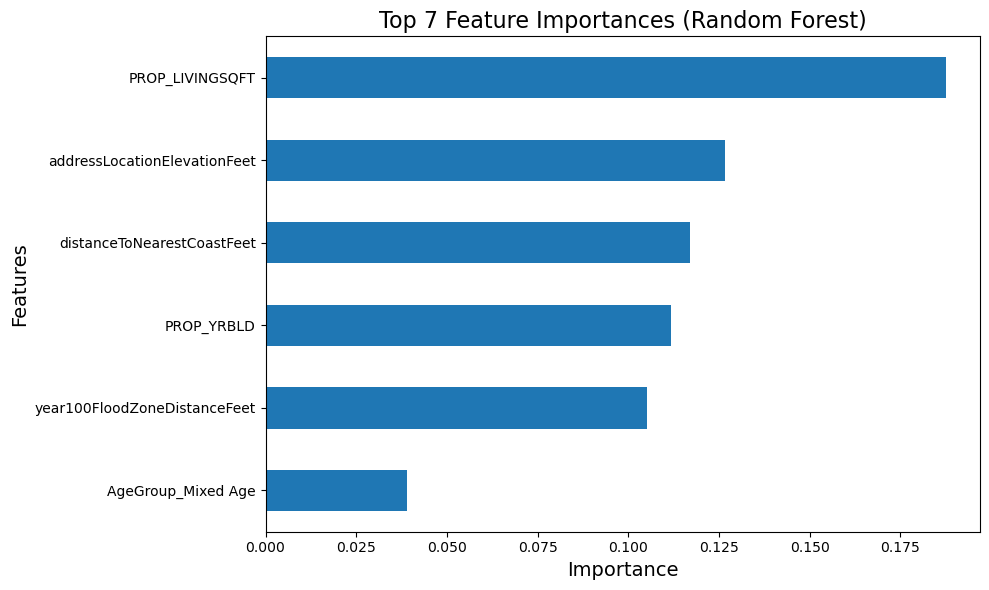

In [12]:
# Feature importance for Random Forest
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Top Random Forest Feature Importances:")
print(rf_importances.head(6))

# Plot the top 6 feature importances for Random Forest
plt.figure(figsize=(10, 6))
rf_importances.head(6).plot(kind='barh')
plt.title('Top 7 Feature Importances (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.tight_layout()
plt.show()